<a href="https://colab.research.google.com/github/kjeyaram-orcl/DataScience/blob/main/MachineLearningBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

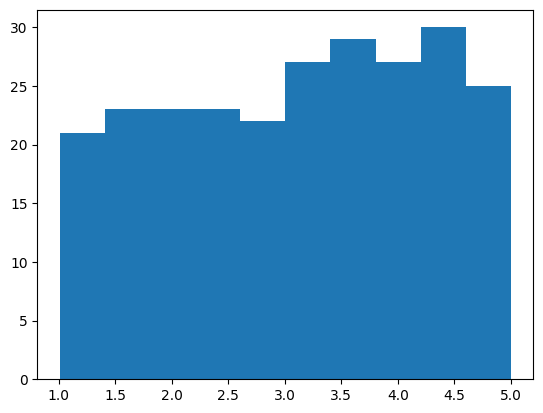

In [7]:
#uniform distribution

import numpy as np
import matplotlib.pyplot as plt

x=np.random.uniform(1.0,5.0,250)
#print(x)

plt.hist(x,10)
plt.show()


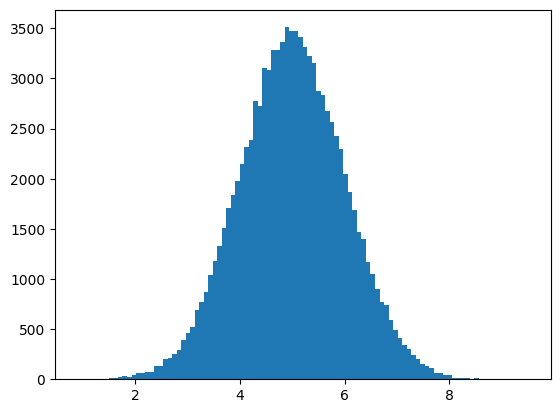

In [12]:
# Normal Distribution

import numpy as np
import matplotlib.pyplot as plt

x=np.random.normal(5.0,1.0,100000) #mean value is 5.0, and the standard deviation is 1.0.
plt.hist(x,100)
plt.show()

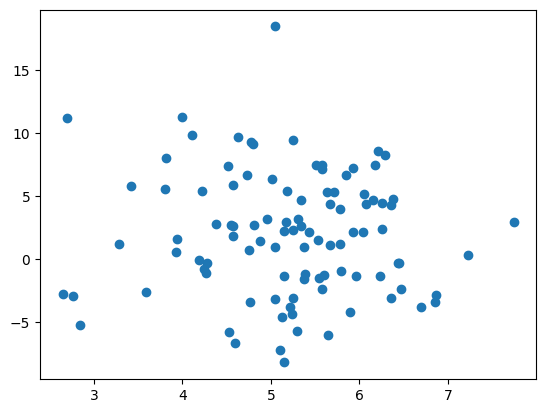

In [13]:
# Scatter plot

import numpy as np
import matplotlib.pyplot as plt

x=np.random.normal(5.0,1.0,100)
y=np.random.normal(2.0,5.0,100)

plt.scatter(x,y)
plt.show()


Linear Regession

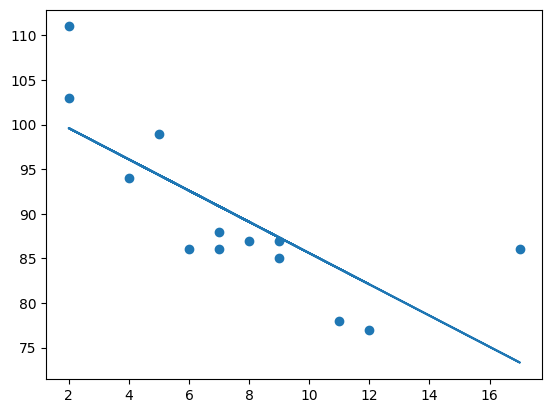

The result -0.75859 shows that there is a relationship, not perfect
he speed of a 10 years old car is  85.59308314937454


In [10]:
# Good Fit
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

#The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.
print ( "The result", round(r,5), "shows that there is a relationship, not perfect")

#Predict Future Values. Example: Let us try to predict the speed of a 10 years old car.
print( 'he speed of a 10 years old car is ' , myfunc(10))


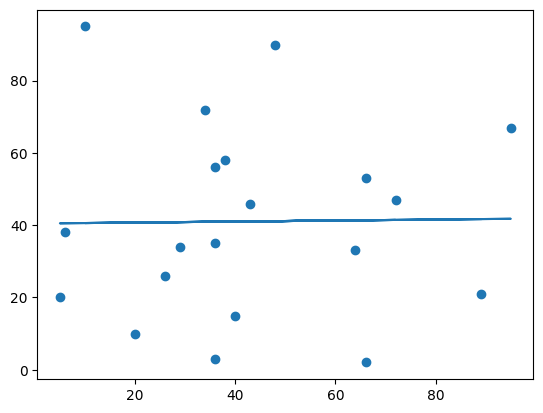

The result 0.01332 indicates a very bad relationship, and tells us that this data set is not suitable for linear regression.


In [9]:
# Bad Fit

import matplotlib.pyplot as plt
from scipy import stats

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

#The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.
print ( "The result", round(r,5), "indicates a very bad relationship, and tells us that this data set is not suitable for linear regression.")
